<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Review" data-toc-modified-id="Data-Review-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Review</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Handling-missing-values" data-toc-modified-id="Handling-missing-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Handling missing values</a></span></li><li><span><a href="#Handling-anomalies" data-toc-modified-id="Handling-anomalies-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Handling anomalies</a></span></li><li><span><a href="#Changing-Data-Types" data-toc-modified-id="Changing-Data-Types-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Changing Data Types</a></span></li><li><span><a href="#Removing-duplicate-values" data-toc-modified-id="Removing-duplicate-values-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Removing duplicate values</a></span></li></ul></li><li><span><a href="#Calculations" data-toc-modified-id="Calculations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculations</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Studying-the-area,-prices,-number-of-rooms,-ceiling-heights" data-toc-modified-id="Studying-the-area,-prices,-number-of-rooms,-ceiling-heights-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Studying the area, prices, number of rooms, ceiling heights</a></span></li><li><span><a href="#Studying-days-advertisment-was-active" data-toc-modified-id="Studying-days-advertisment-was-active-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Studying days advertisment was active</a></span></li><li><span><a href="#Removing-rare-values-and-outliers" data-toc-modified-id="Removing-rare-values-and-outliers-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Removing rare values and outliers</a></span></li><li><span><a href="#The-study-of-factors-affecting-the-price-of-an-apartment" data-toc-modified-id="The-study-of-factors-affecting-the-price-of-an-apartment-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>The study of factors affecting the price of an apartment</a></span></li><li><span><a href="#The-price-of-apartments-in-the-top-10-settlements-by-the-number-of-ads" data-toc-modified-id="The-price-of-apartments-in-the-top-10-settlements-by-the-number-of-ads-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>The price of apartments in the top 10 settlements by the number of ads</a></span></li><li><span><a href="#Locating-of-the-central-zone-of-St.-Petersburg" data-toc-modified-id="Locating-of-the-central-zone-of-St.-Petersburg-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Locating of the central zone of St. Petersburg</a></span></li><li><span><a href="#Analysis-of-the-parameters-of-apartments-in-the-center-of-St.-Petersburg" data-toc-modified-id="Analysis-of-the-parameters-of-apartments-in-the-center-of-St.-Petersburg-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Analysis of the parameters of apartments in the center of St. Petersburg</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Real Estate Prices Research

At our disposal is the data of the ABC Real Estate service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. We need to learn how to determine the market value of the real estate. Our job is to determine the parameters. This will allow the building of an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, airport, nearest park, and reservoir.

**Purpose of the project:** To process and investigate the initial data to establish the parameters necessary for determining the price.

**Research steps:**

Project steps:

* Data review.
* Data preprocessing.
* Calculations and adding results to the table.
* Exploratory data analysis.

## Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
df = pd.read_csv('real_estate_data.csv', sep='\t')

In [2]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.isna().agg(['sum', 'mean'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
sum,0.0,0.0,0.0,0.0,0.0,9195.000000,86.000000,1903.000000,0.0,20924.000000,...,2278.000000,11519.000000,49.000000,5542.00000,5519.000000,5518.000000,15620.0000,5518.000000,14589.000000,3181.000000
mean,0.0,0.0,0.0,0.0,0.0,0.387991,0.003629,0.080299,0.0,0.882906,...,0.096122,0.486054,0.002068,0.23385,0.232879,0.232837,0.6591,0.232837,0.615596,0.134225


DataFrame has twenty-two columns.

According to the documentation:

* `airports_nearest` — distance to the nearest airport (m) 
* `balcony` — number of balconies
* `ceiling_height` — ceiling height (m)
* `cityCenters_nearest` — distance to city center 
* `days_exposition` — days, advertisment was active (from publication to withdrawal)
* `first_day_exposition` — publication date 
* `floor` — floor
* `floors_total` — total floors in a building 
* `is_apartment` — apartment (boolean) 
* `kitchen_area` —  kitchen area (sq.m)
* `last_price` — price on withdrawal 
* `living_area` —  living room area (sq.m) 
* `locality_name` — locality name 
* `open_plan` — open plan (boolean)
* `parks_around3000` — number of parks around (3 km) 
* `parks_nearest` — distance to the nearest park (m) 
* `ponds_around3000` — number of ponds around (3km) 
* `ponds_nearest` — distance to the nearest pond (m) 
* `rooms` — number of rooms 
* `studio` — studio (boolean) 
* `total_area` —  total area (sq.m) 
* `total_images` — number of photos in ad

Number of values in columns differ, therefore there are missing values. 

In [5]:
df.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Conclusion

Each line of the table contains an advertisement for the sale of an apartment. Some of the columns describe the parameters of the apartment, such as price, total area, number of rooms, ceiling height, etc. The rest of the data tells about the location of the apartment: the distance to the center, airport, nearest park, and reservoir.

Preliminarily, we can suggest that there is enough data to test hypotheses. But there are gaps and anomalies in the data.

To move forward, we need to fix problems in the data.

## Data Cleaning

### Handling missing values

**Number of balconies**

Since the number of balconies is an important item in apartment listings, let's assume that missing values in the data indicate that there is no balcony. Thus, we can fill missing values in the balcony column with 0.

In [7]:
df['balcony'].isna().sum()

11519

In [8]:
df['balcony'].fillna(0, inplace=True)

In [9]:
df['balcony'].isna().sum()

0

**Ceiling Height**

Let's fill missed values in column `ceiling_height` with median values 

In [10]:
df['ceiling_height'].isna().sum()

9195

In [11]:
ceiling_height_med = df['ceiling_height'].median()

In [12]:
df['ceiling_height'].fillna(ceiling_height_med, inplace=True)

In [13]:
df['ceiling_height'].isna().sum()

0

**Total Floors in a building**

In [14]:
df['floors_total'].isna().sum()

86

The column contains 86 rows with missing values. Let's replace the missing values with the floor value and add 1 to not make the floor the last one. Since the number of missing values is less than 1%, this will not skew the data.

In [15]:
df['floors_total'] = df['floors_total'].fillna(df['floor'] + 1)

In [16]:
df['floors_total'].isna().sum()

0

**Locality Name**

Dataset has 49 rows with the name of the settlement missing. Since there is no geodata, it is not possible to correctly fill in these gaps. Also, considering that the missing values are only 0.2% of the total, we will remove them.

In [17]:
df['locality_name'].isna().sum()

49

In [18]:
df = df.dropna(axis='index', how='any', subset=['locality_name'])

In [19]:
df['locality_name'].isna().sum()

0

**Days advertisment was active**

Let's see how many missing values are in the `days_exposition` column.

In [20]:
df['days_exposition'].isna().sum()

3180

In [21]:
df.loc[df['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,NaN,...,7.00,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,NaN,...,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,15.60,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,NaN,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset contains 3180 rows with missing values. They may have been due to a glitch, or the ads have not yet been removed from publication. Since we cannot determine the exact reason or request additional information, we will leave these fields blank.

**Kitchen area and Living Room area**

Let's check the missing values of the kitchen area in studio apartments and replace them with `0` because in such apartments the kitchen is combined with the living room.

In [22]:
df.loc[df['kitchen_area'].isna() & df['studio'] == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,NaN,7,NaN,...,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,NaN,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,0,2.65,25.0,18.20,5,NaN,...,NaN,0.0,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,NaN,...,NaN,0.0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,NaN,8,NaN,...,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


In [23]:
df.loc[df['studio'] == True, 'kitchen_area'] = 0

In [24]:
df['kitchen_area'].isna().sum()

2120

Thus, 149 missing values were filled in.

In [25]:
df['kitchen_area'].describe()

count    21530.000000
mean        10.493277
std          5.946174
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Let's fill in the rest of the gaps in the `kitchen_area` column with median values based on the number of rooms and the settlement so as not to distort the distribution. We will do the same with missed values in the `living_room` column.

In [26]:
df[['kitchen_area', 'living_area']].isna().sum()

kitchen_area    2120
living_area     1898
dtype: int64

In [27]:
df['living_area'] = df['living_area'].fillna(df.groupby(['locality_name', 'rooms'])['living_area'].transform('median'))
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby(['locality_name', 'rooms'])['kitchen_area'].transform('median'))

In [28]:
df[['kitchen_area', 'living_area']].isna().sum()

kitchen_area    53
living_area     55
dtype: int64

As we can see, there are still missing values in the column. Let's replace them with the median values for the entire column.

In [29]:
kitchen_area_med = df['kitchen_area'].median()
living_area_med = df['living_area'].median()
df['kitchen_area'].fillna(kitchen_area_med, inplace=True)
df['living_area'].fillna(kitchen_area_med, inplace=True)

In [30]:
df[['kitchen_area', 'living_area']].isna().sum()

kitchen_area    0
living_area     0
dtype: int64

In [31]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

There are still missing values in the following columns: `is_apartment` `airports_nearest` `cityCenters_nearest` `parks_around3000` `parks_nearest` `ponds_around3000` `ponds_nearest`. The data in the `is_apartment` column has boolean type, and we can't fill in missing data without asking for more information. In addition, we don't need this column within the scope of the project, so we will leave it unchanged. Also, we can't fill in missing values in the remaining columns without geolocation data. For this project, we will only need the `cityCenters_nearest` column, but we will leave the gaps in it as is.

### Handling anomalies 

Let's check the column names

In [32]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Let's fix the `cityCenters_nearest` header style and rename the `parks_around3000`, `parks_nearest`, `ponds_around3000` and `ponds_nearest` columns.

In [33]:
df = df.rename(
    columns={
    'cityCenters_nearest': 'city_center_dist_m',
    'parks_around3000': 'parks_around_3000m',
    'parks_nearest': 'parks_nearest_m',
    'ponds_around3000': 'ponds_around_3000m',
    'ponds_nearest': 'ponds_nearest_m'}
)

In [34]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_dist_m',
       'parks_around_3000m', 'parks_nearest_m', 'ponds_around_3000m',
       'ponds_nearest_m', 'days_exposition'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Changing Data Types

Let's change the data type in the columns: `balcony` `last_price` `floors_total` to integers for the convenience of calculations.

In [36]:
df['balcony'] = df['balcony'].astype('int')
df['last_price'] = df['last_price'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')

Let's change the publication date column to the DateTime type. This will help us to use day and time data for further calculations.

In [37]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int32         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

All the necessary data has been converted to the required data types.

### Removing duplicate values

Let's check for duplicates.

In [39]:
df.duplicated().sum()

0

We can see that there are no obvious duplicates in the data. Let's also check for implicit duplicates.

Let's look at the names of settlements and check for duplicates.

In [40]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

The list contains similar names, but with different spellings of the letter `ё`. We will replace all the letters `ё` with `e` to get rid of duplicates.

In [41]:
len(df['locality_name'].unique())

364

In [42]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

In [43]:
len(df['locality_name'].unique())

330

Thus, we removed 34 duplicate names.

## Calculations

Let's calculate and add the price per square meter.

In [44]:
df['sq_meter_price'] = df['last_price'] / df['total_area']

Let's add the day of the week, month, and year of publication.

In [45]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Let's divide the floors into categories: `first`, `last`, and `other`.

In [46]:
def floor_category(row):
    if row['floor'] == 1:
        return 'first'
    if row['floor'] == row['floors_total']:
        return 'last'
    return 'other'

df['floor_category'] = df.apply(floor_category, axis=1)

Let's calculate and add the ratio of the living area to the total area and ratio of the kitchen area to the total area. 

In [47]:
df['ratio_area'] = df['living_area'] / df['total_area']
df['ratio_kitchen'] = df['kitchen_area'] / df['total_area']

Let's check if all the columns have been added.

In [48]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000m,ponds_nearest_m,days_exposition,sq_meter_price,weekday,month,year,floor_category,ratio_area,ratio_kitchen
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,NaN,...,2.0,755.0,NaN,120370.370370,3,3,2019,other,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.60,1,NaN,...,0.0,NaN,81.0,82920.792079,1,12,2018,first,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.30,4,NaN,...,2.0,574.0,558.0,92785.714286,3,8,2015,other,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.76,9,NaN,...,3.0,234.0,424.0,408176.100629,4,7,2015,other,0.287799,0.062893
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,other,0.320000,0.410000


## Exploratory Data Analysis

### Studying the area, prices, number of rooms, ceiling heights

**Let's study the data on the area of apartments and make a histogram.**

In [49]:
df['total_area'].describe().apply('{0:.2f}'.format)

count    23650.00
mean        60.33
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: object

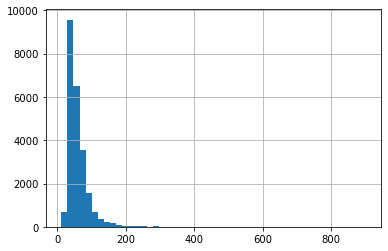

In [50]:
plt.hist(df["total_area"], bins=50)
plt.grid()
plt.show()

Let's create a boxplot to display the distribution and outliers.  

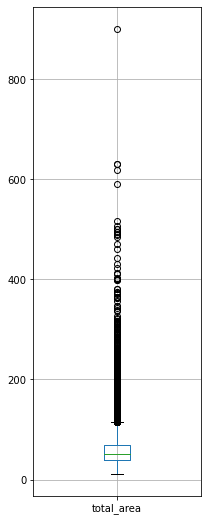

In [51]:
df.boxplot('total_area', figsize=(3, 9))
plt.show()

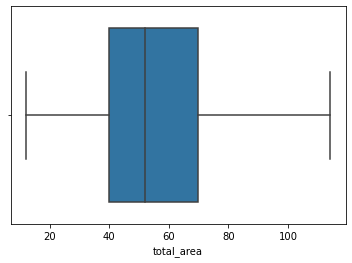

In [52]:
sns.boxplot(x=df.total_area, showfliers=False)
plt.show()

We can see that the values range from 12sq.m to 120sq.m.
The data even includes apartments over 800 sq.m. Let's remove rare values and outliers and make a histogram without them.

In [53]:
total_area_good = df.query('total_area <= 120')

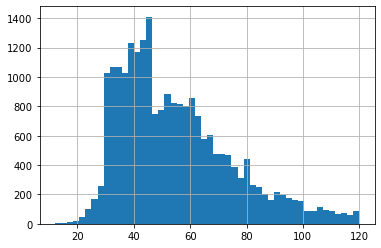

In [54]:
plt.hist(total_area_good["total_area"], bins=50)
plt.grid()
plt.show()

In [55]:
total_area_good['total_area'].describe().apply('{0:.2f}'.format)

count    22591.00
mean        54.84
std         20.09
min         12.00
25%         39.50
50%         50.50
75%         66.00
max        120.00
Name: total_area, dtype: object

The total area histogram has a peak around 45 sq.m. Most of the apartments have an area of 39.5-66 sq.m. The average area is 54.84 sq.m, the median is 50.50 sq.m, and the minimum area is 12 sq.m, but there are not many such apartments. After 100 sq.m, the number of apartments decreases sharply.

**Let's study the data on the price of apartments and make a histogram.**

In [56]:
df['last_price'].describe().apply('{0:.2f}'.format)

count        23650.00
mean       6541126.90
std       10896399.18
min          12190.00
25%        3400000.00
50%        4650000.00
75%        6799000.00
max      763000000.00
Name: last_price, dtype: object

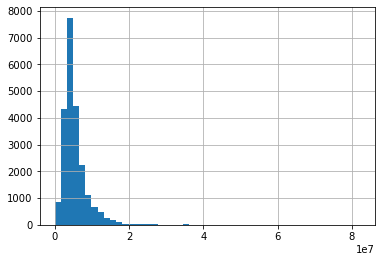

In [57]:
plt.hist(total_area_good["last_price"], bins=50)
plt.grid()
plt.show()

Let's create a boxplot to display the distribution and outliers.  

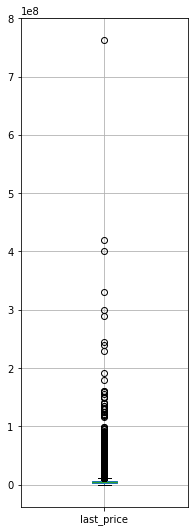

In [58]:
df.boxplot('last_price', figsize=(3, 9))
plt.show()

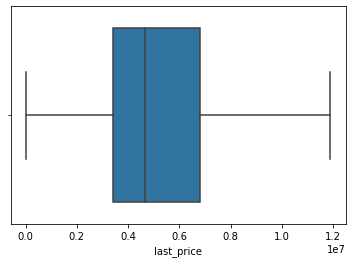

In [59]:
sns.boxplot(x=df.last_price, showfliers=False)
plt.show()

The data contains an abnormally cheap apartment for 12,190 rubles. Most likely it was a data entry error.

In [60]:
df.loc[df['last_price'] < 20000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000m,ponds_nearest_m,days_exposition,sq_meter_price,weekday,month,year,floor_category,ratio_area,ratio_kitchen
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,NaN,...,0.0,NaN,8.0,111.834862,2,3,2019,last,0.293578,0.37156


We can see that most of the apartments have a price of up to 11 million rubles. The maximum price of the apartment is 763 million rubles. There is a rather large gap between the average (6.5m rubles) and the median price (4.7m rubles) as super-expensive apartments shift the distribution. It can also be noted that outliers may represent a segment of luxury real estate. It would be more correct to separate the data into another segment and study it separately, but within the scope of this project, we will remove outliers and make a histogram without them. 

In [61]:
last_price_good = df.query('last_price > 20000 & last_price <= 11000000')

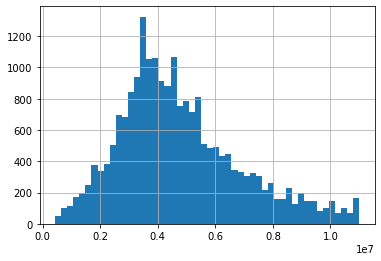

In [62]:
plt.hist(last_price_good["last_price"], bins=50)
plt.grid()
plt.show()

In [63]:
last_price_good['last_price'].describe().apply('{0:.2f}'.format)

count       21372.00
mean      4770150.78
std       2121973.66
min        430000.00
25%       3300000.00
50%       4400000.00
75%       5950000.00
max      11000000.00
Name: last_price, dtype: object

Most of the apartments cost from 3.300.000 rubles to 5.950.000 rubles with a median value of 4.400.000 rubles.

**Let's study the data on the number of rooms and make a histogram.**

In [64]:
df['rooms'].describe().apply('{0:.2f}'.format)

count    23650.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: object

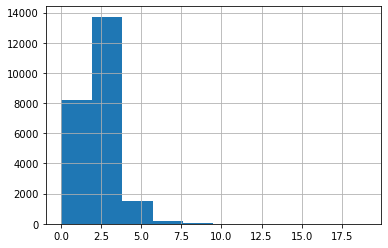

In [65]:
plt.hist(df["rooms"], bins=10)
plt.grid()
plt.show()

Let's create a boxplot to display the distribution and outliers.  

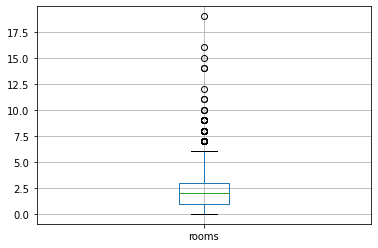

In [66]:
df.boxplot('rooms')
plt.show()

Most apartments (Q1 - Q3) have 1 to 3 rooms. The spread of normal values is from 0 to 6 rooms. There is a small segment of apartments with 0 rooms - studio apartments. There are also apartments with 15 or more rooms. Let's remove rare values and outliers and create a histogram without them.

In [67]:
rooms_good = df.query('rooms <= 6')

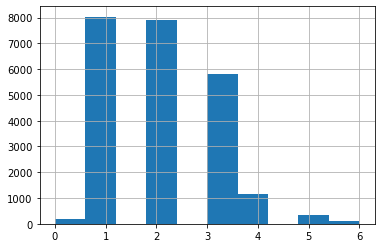

In [68]:
plt.hist(rooms_good["rooms"], bins=10)
plt.grid()
plt.show()

In [69]:
rooms_good['rooms'].describe().apply('{0:.2f}'.format)

count    23560.00
mean         2.05
std          1.01
min          0.00
25%          1.00
50%          2.00
75%          3.00
max          6.00
Name: rooms, dtype: object

Most of the apartments have 1-3 rooms with a predominance of one-room apartments.

**Let's study the data on the height of the ceilings and make a histogram.**

In [70]:
df['ceiling_height'].describe().apply('{0:.2f}'.format)

count    23650.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: object

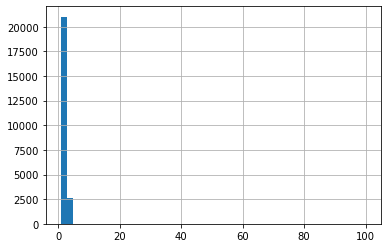

In [71]:
plt.hist(df["ceiling_height"], bins=50)
plt.grid()
plt.show()

The histogram shows that there are abnormally large outliers in the data.

Let's create a boxplot to display the distribution and outliers.  

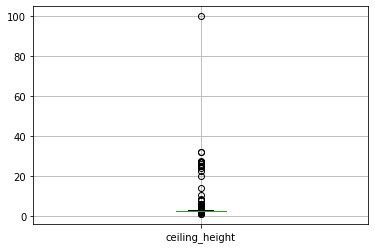

In [72]:
df.boxplot('ceiling_height')
plt.show()

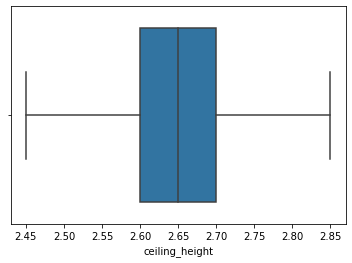

In [73]:
sns.boxplot(x=df.ceiling_height, showfliers=False)
plt.show()

Most of the apartments have ceiling heights ranging from 2.4m to 3m. The minimum ceiling height is 1m, which is a data entry error. The data also includes apartments with a ceiling height of more than 5 meters. Even if we take into account that there are duplex apartments in the ads, this data looks implausible. They, too, most likely appeared as a result of data entry errors. For example 27m instead of 2.7m. Let's remove rare values and outliers and create a histogram.

In [74]:
ceiling_height_good = df.query('ceiling_height > 2.2 and ceiling_height < 5')

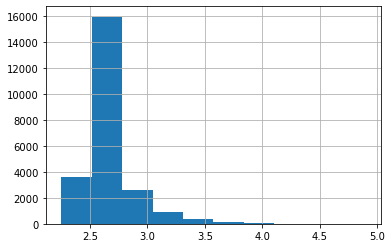

In [75]:
plt.hist(ceiling_height_good["ceiling_height"], bins=10)
plt.grid()
plt.show()

In [76]:
ceiling_height_good['ceiling_height'].describe().apply('{0:.2f}'.format)

count    23598.00
mean         2.70
std          0.21
min          2.25
25%          2.60
50%          2.65
75%          2.70
max          4.90
Name: ceiling_height, dtype: object

Most of the apartments have ceiling heights ranging from 2.6m to 2.7m

### Studying days advertisment was active

Let's study the data on the time of sale of apartments and make a histogram.

In [77]:
df['days_exposition'].describe().apply('{0:.2f}'.format)

count    20470.00
mean       180.75
std        219.78
min          1.00
25%         45.00
50%         95.00
75%        231.00
max       1580.00
Name: days_exposition, dtype: object

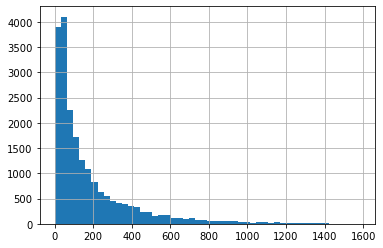

In [78]:
df['days_exposition'].hist(bins=50)
plt.show()

Let's create a boxplot to display the distribution and outliers.  

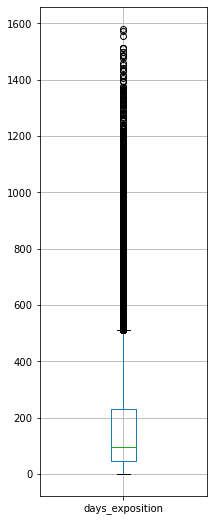

In [79]:
df.boxplot('days_exposition', figsize=(3, 9))
plt.show()

We can see that most of the values range from 45 to 231 days. The range of normal values is from 1 to 510. Note that there are several values in the data less than 3 days old. It is likely that the people who posted the ads removed them for some reason. The difference between the mean and median is almost two times. This is because the distribution has a long tail of high values that drag the mean to the right. The maximum value is 1580 days. Let's remove rare values and outliers and create a histogram.

In [80]:
good_days_exposition = df.query('days_exposition > 2 and days_exposition <= 510')

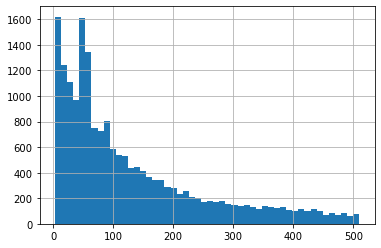

In [81]:
good_days_exposition['days_exposition'].hist(bins=50)
plt.show()

In [82]:
print(f'Mean `days_exposition` before removing outliers: {df["days_exposition"].mean():.0f} days')
print(f'Mean `days_exposition` after removing outliers: {good_days_exposition["days_exposition"].mean():.0f} days \n')

print(f'Median `days_exposition` before removing outliers: {df["days_exposition"].median():.0f} days')
print(f'Median `days_exposition` after removing outliers: {good_days_exposition["days_exposition"].median():.0f} days')

Mean `days_exposition` before removing outliers: 181 days
Mean `days_exposition` after removing outliers: 128 days 

Median `days_exposition` before removing outliers: 95 days
Median `days_exposition` after removing outliers: 85 days


###### Conclusion

After examining the data and graphs, we can conclude that the sale went quickly if less than 45 days have passed since the publication. And too long if the ad has been published for more than 510 days.

### Removing rare values and outliers

Remove rare values and outliers such as:
* `total area` over 120sq.m
* `price` less than 20 thousand rubles and more than 11 million rubles
* more than 6 rooms
* ceiling height less than 2.2m and more than 5m
* ad publishing time less than 3 days and more than 510 days

We will save the slice in the `good_df` variable

In [83]:
good_df = df.query(
                   'total_area <= 120 and '
                   'last_price > 20000 & last_price <= 11000000 and '
                   'rooms  <= 6 and '
                   'ceiling_height > 2.2 and ceiling_height < 5 and '
                   'days_exposition > 2 and days_exposition <= 510')

### The study of factors affecting the price of an apartment

Let's check how the area of the apartment affects the price. We will calculate the correlation coefficient and create a scatterplot.

In [84]:
good_df['total_area'].corr(good_df['last_price'])

0.6946407945482348

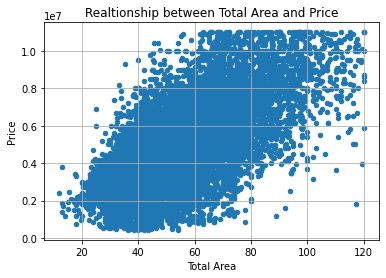

In [85]:
good_df.plot(x='total_area', y='last_price', kind='scatter', grid=True)
plt.title('Realtionship between Total Area and Price')
plt.xlabel('Total Area')
plt.ylabel('Price')
plt.show()

The correlation coefficient is 0.69, which indicates a strong positive relationship between the total area and the price of the apartment. Also, the scatter diagram shows that there is a dependence of price on total_area, although there are outliers.

Let's check how the number of rooms in an apartment affects its price. We will calculate the correlation coefficient and create a scatterplot.

In [86]:
good_df['rooms'].corr(good_df['last_price'])

0.4438179623942936

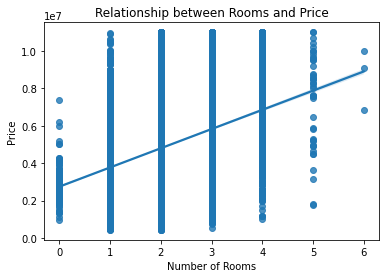

In [87]:
sns.regplot(data=good_df, x='rooms', y='last_price')
plt.title('Relationship between Rooms and Price')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

The correlation coefficient is 0.44, which indicates an average positive correlation between the factors. The graph shows that there is a direct dependence of the price on the number of rooms.

Let's check how the distance from the center affects the price. We will calculate the correlation coefficient and create a scatterplot.

In [88]:
good_df['city_center_dist_m'].corr(good_df['last_price'])

-0.33822971790625717

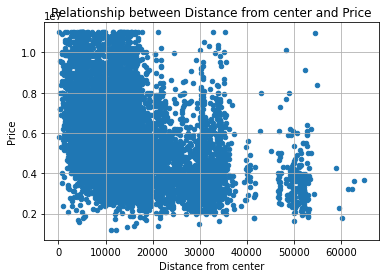

In [89]:
good_df.plot(x='city_center_dist_m', y='last_price', kind='scatter', grid=True)
plt.title('Relationship between Distance from center and Price')
plt.xlabel('Distance from center')
plt.ylabel('Price')
plt.show()

Let's also look at a scatterplot using raw data.

In [90]:
df['city_center_dist_m'].corr(df['last_price'])

-0.20688702501498776

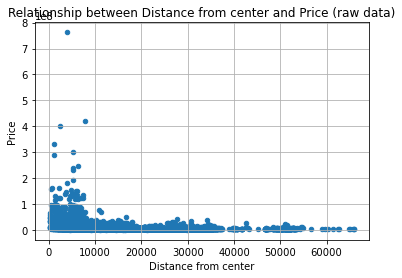

In [91]:
df.plot(x='city_center_dist_m', y='last_price', kind='scatter', grid=True)
plt.title('Relationship between Distance from center and Price (raw data)')
plt.xlabel('Distance from center')
plt.ylabel('Price')
plt.show()

The correlation coefficient is -0.34, which indicates a weak negative correlation. We can see that with the increase in the distance from the center, the price of apartments falls. At the same time, small spikes are present in the data at a distance of 30 km and 50 km from the center. Perhaps these are apartments in the centers of settlements neighboring St. Petersburg.

Let's check how the floor affects the apartment price. We will create boxplots for three categories - the first, the last, and the other.

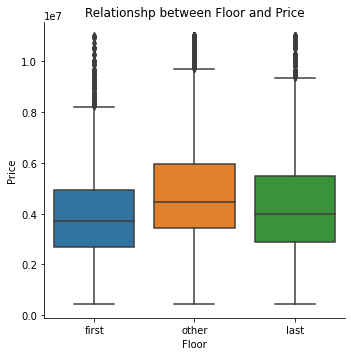

In [92]:
sns.catplot(data=good_df, x='floor_category', y='last_price', kind='box')
plt.title('Relationshp between Floor and Price')
plt.xlabel('Floor')
plt.ylabel('Price')
plt.show()

The lowest prices are for apartments located on the ground floor, and the highest prices are for apartments on the floors between the first and last.

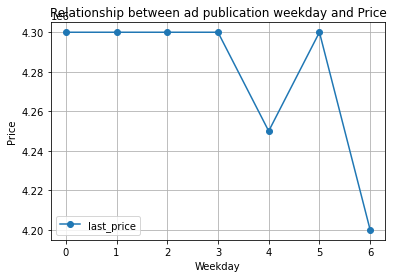

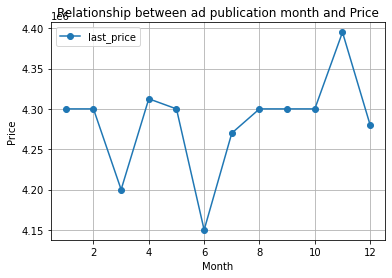

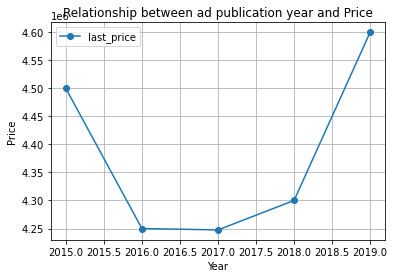

In [93]:
good_df.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(y='last_price', style='o-', grid=True)
plt.title('Relationship between ad publication weekday and Price')
plt.xlabel("Weekday")
plt.ylabel("Price")
plt.show()

good_df.pivot_table(index='month', values='last_price', aggfunc='median').plot(y='last_price', style='o-', grid=True)
plt.title('Relationship between ad publication month and Price')
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

good_df.pivot_table(index='year', values='last_price', aggfunc='median').plot(y='last_price', style='o-', grid=True)
plt.title('Relationship between ad publication year and Price')
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

###### Conclusion

* There is a clear dependence of the price on the total area and the number of rooms
* The closer the apartments are to the center, the higher the price. At the same time, there are small spikes in the data at a distance of 30 km and 50 km from the center. Perhaps these are the apartments in the centers of settlements neighboring St. Petersburg.
* The lowest price is for apartments located on the ground floor, and the highest price is for apartments on floors between the first and the last
* The price of apartments rises from Monday to Wednesday, and begins to fall sharply on Thursday, reaching a minimum on Friday. Then rises sharply on Saturday and falls on Sunday
* Apartment prices rise from October until the end of the year, and from the beginning of the year until April. Then they begin to fall sharply, reaching a minimum in June.
* Apartment prices fell sharply in 2015 and continued to fall until 2017. Starting from 2018, the market began to recover and grow in 2019

### The price of apartments in the top 10 settlements by the number of ads

In [94]:
top_10 = good_df.pivot_table(index='locality_name', values='sq_meter_price', aggfunc=['count', 'mean'])
top_10.columns = ['count', 'mean_sq_meter_price']
top_10.sort_values(by='count', ascending=False)[:10]

,count,mean_sq_meter_price
locality_name,,
Санкт-Петербург,11042,104002.293750
поселок Мурино,516,85936.528290
поселок Шушары,387,77899.853098
Всеволожск,305,66807.553551
Колпино,291,74508.355292
поселок Парголово,287,89336.954129
деревня Кудрово,267,92600.436714
Пушкин,258,99062.732446
Гатчина,240,68288.075254


###### Conclusion

The highest housing price is in St. Petersburg - 105,300 rubles per square meter, and the lowest is in Vyborg - 58,464 rubles per square meter. 

### Locating of the central zone of St. Petersburg

Let's study the ads. First, we will separate apartments in St. Petersburg and then determine the city's central zone.  

In [95]:
spb_flats = good_df.copy()
spb_flats = spb_flats.loc[spb_flats['locality_name'] == 'Санкт-Петербург']
spb_flats['city_center_dist_km'] = np.round(spb_flats['city_center_dist_m']/1000, 0)

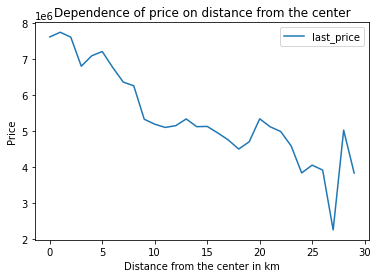

In [96]:
spb_flats.pivot_table(index='city_center_dist_km', values='last_price').plot()
plt.title('Dependence of price on distance from the center')
plt.xlabel('Distance from the center in km')
plt.ylabel('Price')
plt.show()

###### Conclusion

We can see from the chart that the price begins to fall sharply after the 9km mark. Thus, the central zone of St. Petersburg has a radius of 9 km. The graph also shows price spikes in the region of 20km and 27km - these can be apartments on Kamenny Island, where housing is more expensive. 

### Analysis of the parameters of apartments in the center of St. Petersburg

Let's select a segment of apartments in the center. Let's analyze this territory and study the following parameters: area, price, number of rooms, and ceiling height. We also highlight the factors that affect the appartment price. 

In [97]:
spb_flats_center = spb_flats.copy()

In [98]:
spb_flats_center = spb_flats_center.loc[spb_flats_center['city_center_dist_km'] <= 9]

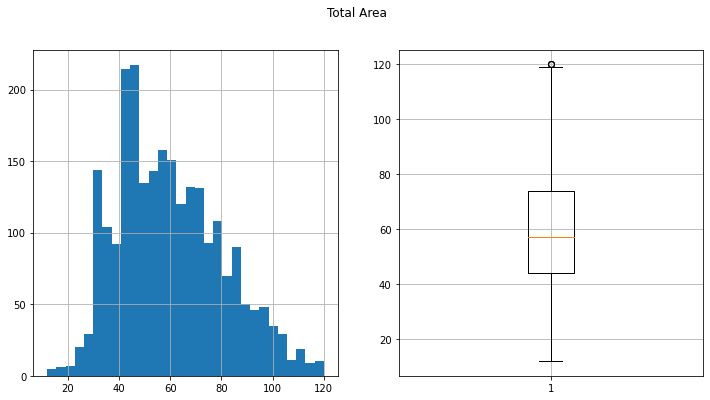

count    2426.00
mean       59.92
std        20.51
min        12.00
25%        44.00
50%        57.10
75%        74.00
max       120.00
Name: total_area, dtype: object

In [99]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(spb_flats_center['total_area'], bins=30)
axs[0].grid()

axs[1].boxplot(spb_flats_center['total_area'])
axs[1].grid()

plt.suptitle('Total Area')
plt.show()

spb_flats_center['total_area'].describe().apply('{0:.2f}'.format)

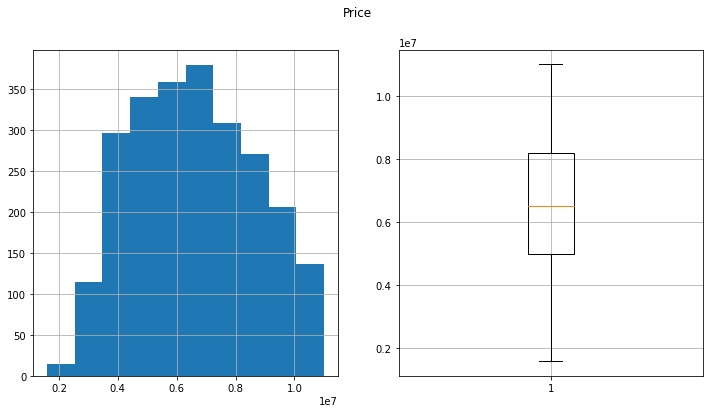

count        2426.00
mean      6606174.49
std       2098357.49
min       1600000.00
25%       4990000.00
50%       6500000.00
75%       8200000.00
max      11000000.00
Name: last_price, dtype: object

In [100]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(spb_flats_center['last_price'])
axs[0].grid()

axs[1].boxplot(spb_flats_center['last_price'])
axs[1].grid()

plt.suptitle('Price')
plt.show()

spb_flats_center['last_price'].describe().apply('{0:.2f}'.format)

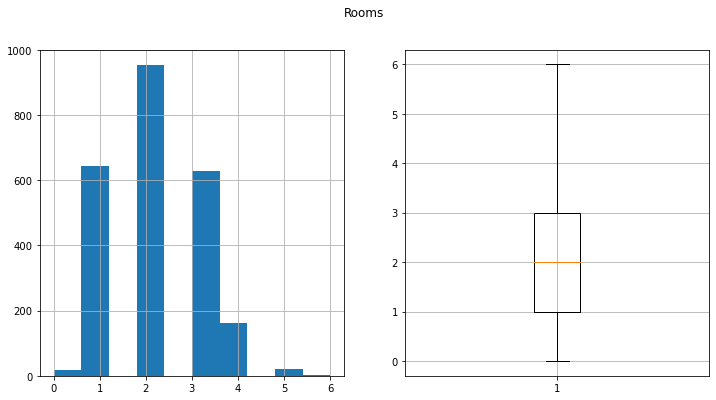

count    2426.00
mean        2.14
std         0.94
min         0.00
25%         1.00
50%         2.00
75%         3.00
max         6.00
Name: rooms, dtype: object

In [101]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(spb_flats_center['rooms'])
axs[0].grid()

axs[1].boxplot(spb_flats_center['rooms'])
axs[1].grid()

plt.suptitle('Rooms')
plt.show()

spb_flats_center['rooms'].describe().apply('{0:.2f}'.format)

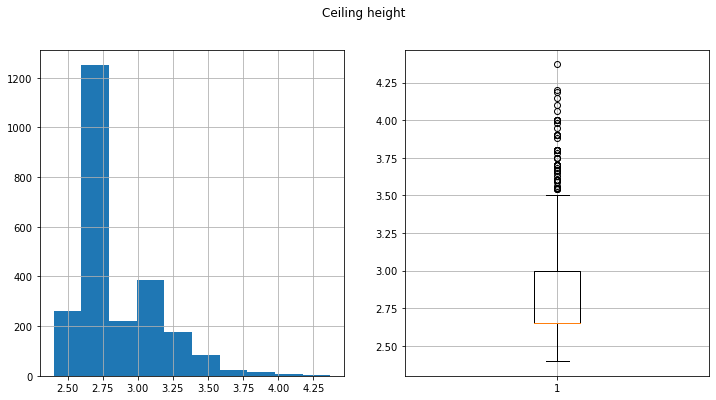

count    2426.00
mean        2.81
std         0.29
min         2.40
25%         2.65
50%         2.65
75%         3.00
max         4.37
Name: ceiling_height, dtype: object

In [102]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(spb_flats_center['ceiling_height'])
axs[0].grid()

axs[1].boxplot(spb_flats_center['ceiling_height'])
axs[1].grid()

plt.suptitle('Ceiling height')
plt.show()

spb_flats_center['ceiling_height'].describe().apply('{0:.2f}'.format)

Having studied such parameters as area, price, number of rooms, and ceiling height for apartments in the center of St. Petersburg, the following features can be distinguished:
* Most of the apartments have an area of 44.3sq.m to 74.5sq.m with a median value of 58sq.m and an average of 60.36m
* Price of most apartments is from 5,050,000 rubles to 8,389,000 rubles with a median value of 6,650,000 rubles 
* Most of the apartments have from 1 to 3 rooms. 2-room apartments predominate
* Most of the apartments have ceiling heights from 2.65m to 3m 

Let's calculate the correlation coefficients between the price of apartments, the number of rooms, and the distance from the center, and also build a matrix of scatterplots.

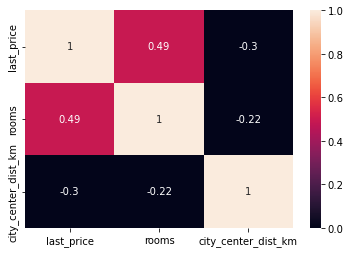

In [103]:
sns.heatmap(spb_flats_center[['last_price', 'rooms', 'city_center_dist_km']].corr(), annot=True, vmax=1, vmin=0)
plt.show()

The correlation table shows that there is a medium positive correlation (0.49) between the number of rooms and the price of apartments, as well as a weak negative correlation (-0.3) between the distance from the center and the price. Thus, it can be noted that with an increase in the number of rooms, the price also increases, and also that the farther from the center an apartment is located, the cheaper it is. 

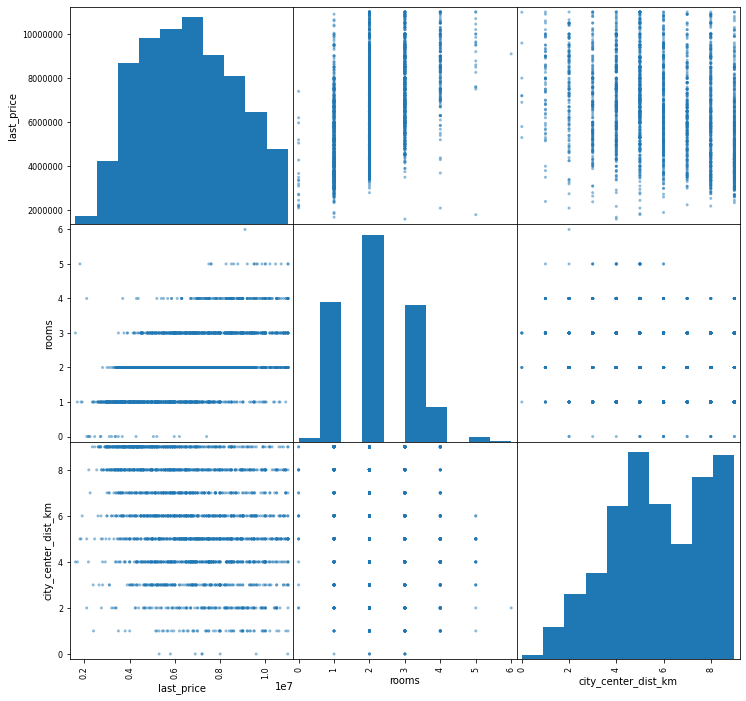

In [104]:
pd.plotting.scatter_matrix(spb_flats_center[['last_price', 'rooms', 'city_center_dist_km']], figsize=(12,12))
plt.show()

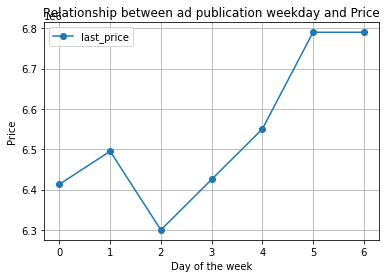

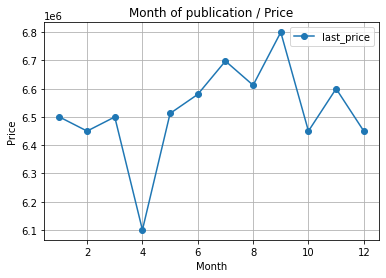

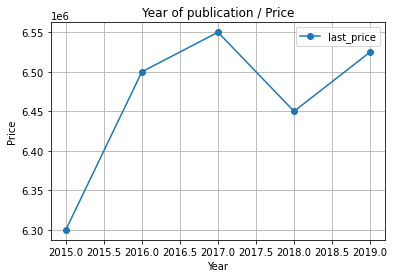

In [105]:
spb_flats_center.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(y='last_price', style='o-', grid=True)
plt.title('Relationship between ad publication weekday and Price')
plt.xlabel('Day of the week')
plt.ylabel('Price')
plt.show()

spb_flats_center.pivot_table(index='month', values='last_price', aggfunc='median').plot(y='last_price', style='o-', grid=True)
plt.title('Month of publication / Price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

spb_flats_center.pivot_table(index='year', values='last_price', aggfunc='median').plot(y='last_price', style='o-', grid=True)
plt.title('Year of publication / Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

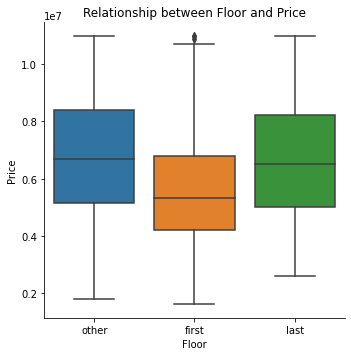

In [106]:
sns.catplot(data=spb_flats_center, x='floor_category', y='last_price', kind='box')
plt.title('Relationship between Floor and Price')
plt.xlabel('Floor')
plt.ylabel('Price')
plt.show()

Having studied the graphs and taking into account the correlation coefficients, we can come to the following conclusions:
* There is a clear dependence of the price on the number of rooms 
* The closer the apartments are to the center, the higher the price 
* Prices in the ads posted on Tuesdays and Thursdays are the lowest, with a slight rise on Wednesdays. Starting Friday, the price rises and peaks on Sunday
* The ads published from October to May have the lowest prices. The prices rise from June and peak in September. 
* Apartment prices have been gradually increasing since 2015
* The ground floor apartments have the lowest prices, while apartments that are located on 'other floors' or on the last floor have similar prices 

###### Conclusion

Comparing the data for the center of St. Petersburg with the data for the entire database, we can note the following differences:
The average area of apartments in the center is larger than all data average - 60.36 sq. m against 54.8 sq.m
* Apartments in the center are much more expensive. Median values 6.650.000 rubles against 4.400.000 rubles
* Apartments mostly have 1 to 3 rooms.  Two-room apartments prevail in the center, and one-room apartments prevail for all data
* Apartments in the center have higher ceilings
* The price of apartments in the center, as well as throughout the database, depends on the number of rooms, proximity to the center, and floor. It can also be noted that although apartments on the first floors are equally cheaper everywhere, across the entire database, apartments on the 'other floors' are more expensive than apartments on the top floor. At the same time, in the central-zone data, apartments on the 'other floors' and on the last ones have similar prices.
* In the center, the prices of apartments published on weekends are higher, while in the data for the entire database, prices are higher mainly from Monday to Wednesday
* Central-zone apartments have higher prices in the summer, while the apartments throughout the database have higher prices from October to April
* The prices of apartments in the central zone have been gradually growing since 2015, while across the database they fell from 2015 to 2017 and began to grow only from 2018

## Conclusion

During the project we have discovered missing values and anomalies in the data. Missing values in the `balcony` column are filled with `0`. Missing values in `ceiling_height` are filled with median values. We have replaced missing values in `floors_total` with floor value +1 to avoid making the floor last. Removed missing data in `locality_name` column. The gaps in the `kitchen_area` column for studio apartments were replaced with 0, then the rest of the gaps, as well as the gaps in the `living_area` column, were replaced with median values based on the number of rooms and settlement, and the rest were replaced with the column median. Fixed heading style in 'cityCenters_nearest' column and renamed some columns. We changed the data type in the 'balcony', 'last_price' and 'floors_total' columns to 'int' for the convenience of calculations, and also changed the type in the 'first_day_exposition' column to 'datetime'. After that, we calculated the price per square meter, the ratio of residential and total area, as well as the ratio of the kitchen area to the total area and added them to the table. Then we added the day, month and year of the publication of the ad and divided the floor of the apartment into categories.


During the analysis of the data, the following results were obtained:

1. Parameters affecting the price of an apartment have been identified:

* Total area
* Number of rooms
* Apartment floor
* Proximity to the center
* Day, month and year of ad posting

2. The following patterns were found:

* It usually takes 85-128 days from the day the ad is placed to the sale of the apartment
* The highest sqare meter price is in St. Petersburg, and the lowest in Vyborg
* Apartments on the first floor are cheaper than on any other

3. Differences of St. Petersburg's central-zone ads from all-database ads:

* The area of apartments, the number of rooms, the ceiling heights are on average higher in the center of St. Petersburg
* The last floor in the center of St. Petersburg does not reduce the price of the apartment
* Apartment prices of ads published on weekends and in summer are higher
* Prices for apartments in the center have been growing since 2015, while across the database they have been falling from 2015 to 2017 and started to grow only from 2018


It can also be noted that there are many outliers in the `price` and `total_area` data. This data may represent a segment of luxury real estate. In further research, it would be right to separate the data into the luxury segment and investigate further.